

```
`# This is formatted as code`
```

# Unsupervised Learning – Real-Life Applications
**Overview**
This Sheet explains the concept of clustering in machine learning. It explains three of the most common clustering algorithms, with a hands-on approximation to solve a real-life data problem. By the end of this sheet, you should have a firm understanding of how to create clusters out of a dataset using the k-means, mean-shift, and DBSCAN algorithms, as well as the ability to measure the accuracy of those clusters.

## Introduction
This Sheet focuses on the most important task in the field of unsupervised
learning: clustering. Consider a situation in which you are a store owner wanting
to make a targeted social media campaign to promote selected products to certain
customers. Using clustering algorithms, you would be able to create subgroups of
your customers, allowing you to profile those subgroups and target them accordingly.
The main objective of this Sheet is to solve a case study, where you will implement
three different unsupervised learning solutions. These different applications serve
to demonstrate the uniformity of the scikit-learn API, as well as to explain the steps
taken to solve machine learning problems. By the end of this Sheet, you will be
able to understand the use of unsupervised learning to comprehend data in order to
make informed decisions.

## Clustering
**Clustering** is a type of unsupervised learning technique where the objective is to
arrive at conclusions based on the patterns found within unlabeled input data. This
technique is mainly used to segregate large data into subgroups in order to make
informed decisions.

For instance, from a large list of restaurants in a city, it would be useful to segregate
the data into subgroups (clusters) based on the type of food, quantity of clients, and
style of experience, in order to be able to offer each cluster a service that's been
configured to its specific needs.

Clustering algorithms divide the data points into n number of clusters so that the data
points in the same cluster have similar features, whereas they differ significantly from
the data points in other clusters.

## Clustering Types
Clustering algorithms can classify data points using a methodology that is either **hard
or soft**. The former designates data points completely to a cluster, whereas the latter
method calculates the probability of each data point belonging to each cluster.

For
example, for a dataset containing customer's past orders that are divided into eight
subgroups (clusters), hard clustering occurs when each customer is placed inside
one of the eight clusters. On the other hand, soft clustering assigns each customer a
probability of belonging to each of the eight clusters.

Considering that clusters are created based on the similarity between data points,
clustering algorithms can be further divided into several groups, depending on the set
of rules used to measure similarity. Four of the most commonly known sets of rules
are explained as follows:

• **Connectivity-based models:** This model's approach to similarity is based on
proximity in a data space. The creation of clusters can be done by assigning all
data points to a single cluster and then partitioning the data into smaller clusters
as the distance between data points increases. Likewise, the algorithm can also
start by assigning each data point an individual cluster, and then aggregating
data points that are close by. An example of a connectivity-based model is
**hierarchical clustering.**

• **Density-based models:** As the name suggests, these models define clusters by
their density in the data space. This means that areas with a high density of data
points will become clusters, which are typically separated from one another by
low-density areas. An example of this is the DBSCAN algorithm, which will be
covered later in this Sheet.

• **Distribution-based models:** Models that fall into this category are based on the
probability that all the data points from a cluster follow the same distribution,
such as a Gaussian distribution. An example of such a model is the Gaussian
Mixture algorithm, which assumes that all data points come from a mixture of a
finite number of Gaussian distributions.

• **Centroid-based models:** These models are based on algorithms that define a
centroid for each cluster, which is updated constantly by an iterative process.
The data points are assigned to the cluster where their proximity to the centroid
is minimized. An example of such a model is the k-means algorithm, which will
be discussed later in this Sheet.

In conclusion, data points are assigned to clusters based on their similarity to each
other and their difference from data points in other clusters. This classification into
clusters can be either absolute or variably distributed by determining the probability
of each data point belonging to each cluster.

Moreover, there is no fixed set of rules to determine similarity between data points,
which is why different clustering algorithms use different rules. Some of the most
commonly known sets of rules are connectivity-based, density-based, distributionbased,
and centroid-based.

## Applications of Clustering
As with all machine learning algorithms, clustering has many applications in different
fields, some of which are as follows:

• **Search engine results:** Clustering can be used to generate search engine results
containing keywords that are approximate to the keywords searched by the user
and ordered as per the search result with greater similarity. Consider Google
as an example; it uses clustering not only for retrieving results but also for
suggesting new possible searches.

• **Recommendation programs:** It can also be used in recommendation programs
that cluster together, for instance, people that fall into a similar profile, and then
make recommendations based on the products that each member of the cluster
has bought. Consider Amazon, for example, which recommends more items
based on your purchase history and the purchases of similar users.

• **Image recognition:** This is where clusters are used to group images that are
considered to be similar. For instance, Facebook uses clustering to help suggest
who is present in a picture.

• **Market segmentation:** Clustering can also be used for market segmentation
to divide a list of prospects or clients into subgroups in order to provide a
customized experience or product. For example, Adobe uses clustering analysis
to segment customers in order to target them differently by recognizing those
who are more willing to spend money.

## Exploring a Dataset – Wholesale Customers Dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DATA_SET/Wholesale customers data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


## Understanding the Dataset
Each step will be explained generically and will then be followed by an explanation of
its application in the current case study (the Wholesale Customers dataset):

1.) First of all, it is crucial to understand the way in which data is presented by the
person who's responsible for gathering and maintaining it.

Considering that the dataset of the case study was obtained from an online
repository, the format in which it is presented must be understood. The
Wholesale Customers dataset consists of a snippet of historical data of clients
from a wholesale distributor. It contains a total of 440 instances (each row) and
eight features (each column).

2.) Next, it is important to determine the purpose of the study, which is dependent
on the data that's available. Even though this might seem like a redundant
statement, many data problems become problematic because the researcher
does not have a clear view of the purpose of the study, and hence the
pre-processing methodology, the model, and the performance metrics are
chosen incorrectly.

The purpose of using clustering algorithms on the Wholesale Customers dataset
is to understand the behavior of each customer. This will allow you to group
customers with similar behaviors into one cluster. The behavior of a customer
will be defined by how much they spent on each category of product, as well as
the channel and the region where they bought products.

3.)Subsequently explore all the features that are available. This is mainly done for
two reasons: first, to rule out features that are considered to be of low relevance
based on the purpose of the study or that are considered to be redundant, and
second, to understand the way the values are presented to determine some of
the pre-processing techniques that may be needed.

The current case study has eight features, each one of which is considered
to be relevant to the purpose of the study. Each feature is explained in the
following table:

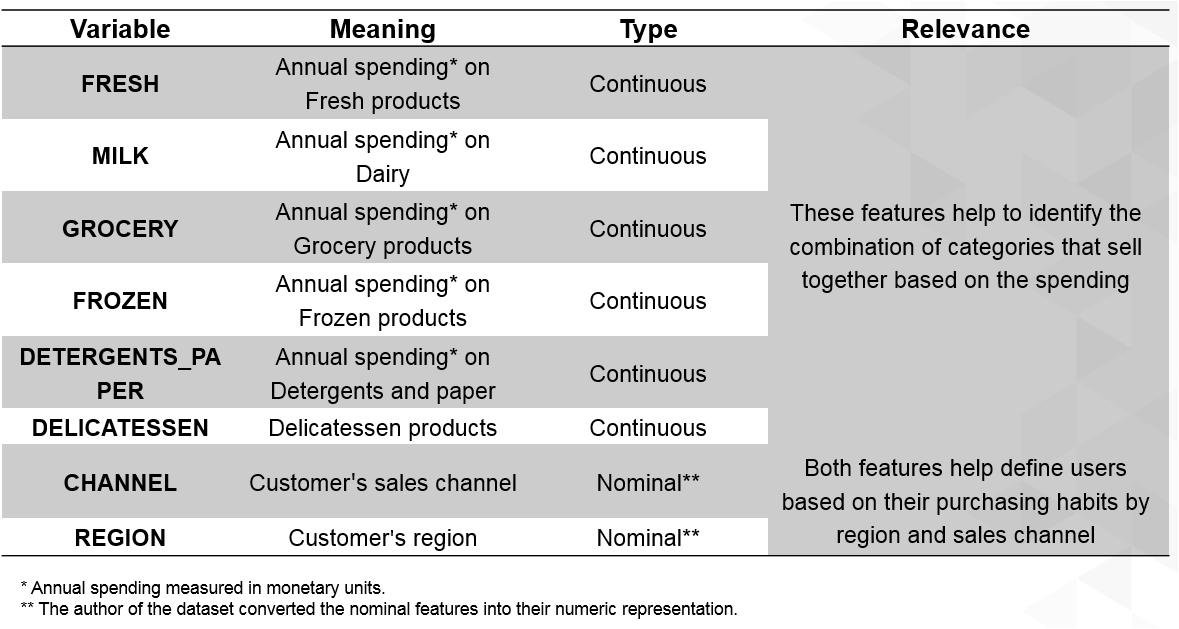

In the preceding table, no features are to be dismissed, and nominal (categorical)
features have already been handled by the author of the dataset.


As a summary, the first thing to do when choosing a dataset or being handed one
is to understand the characteristics that are visible at first glance, which involves
recognizing the information available, then determining the purpose of the project,
and finally revising the features to select those that will be part of the study. After
this, the data can be visualized so that it can be understood before it's pre-processed.

## Data Visualization
Once data has been revised to ensure that it can be used for the desired purpose,
it is time to load the dataset and use data visualization to further understand it.
Data visualization is not a requirement for developing a machine learning project,
especially when dealing with datasets with hundreds or thousands of features.
However, it has become an integral part of machine learning, mainly for visualizing
the following:

• Specific features that are causing trouble (for example, those that contain many
missing or outlier values) and how to deal with them.

• The results from the model, such as the clusters that have been created or the
number of predicted instances for each labeled category.


• The performance of the model, in order to see the behavior along
different iterations.

Data visualization's popularity in the aforementioned tasks can be explained by the
fact that the human brain processes information easily when it is presented as charts
or graphs, which allows us to have a general understanding of the data. It also helps
us to identify areas that require attention, such as outliers.

## Visualization Tools
Some of the most commonly used plot types are explained in the following table:

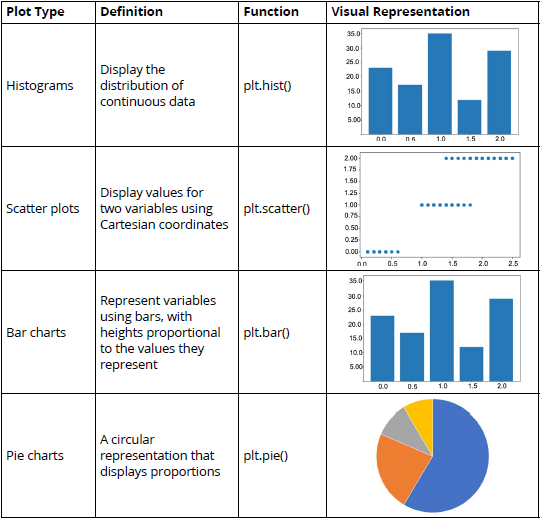

## Exercise 2.01: Plotting a Histogram of One Feature from the Circles Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DATA_SET/circle_data.csv')
data.head()

,0,1,Unnamed: 2
0,0.393992,-0.416376,NaN
1,0.528243,-0.828242,NaN
2,-0.740158,0.607730,NaN
3,-0.971016,0.316821,NaN
4,0.018693,-0.605288,NaN


In [ ]:
data.shape

(1500, 3)

In [ ]:
data.columns

Index(['0', '1', 'Unnamed: 2'], dtype='object')

In [ ]:
data = data.drop('Unnamed: 2', axis=1)
data

,0,1
0,0.393992,-0.416376
1,0.528243,-0.828242
2,-0.740158,0.607730
3,-0.971016,0.316821
4,0.018693,-0.605288
...,...,...
1495,0.085197,-0.463028
1496,0.890820,0.003483
1497,0.223768,-0.419122
1498,0.221189,-0.510314


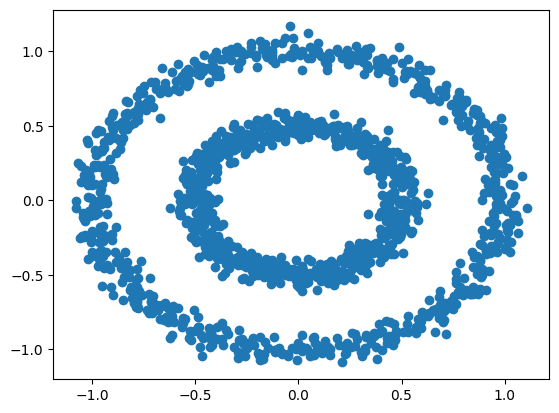

In [ ]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1])
plt.show()

Create a histogram out of one of the two features. Use slicing to select the
feature that you wish to plot:

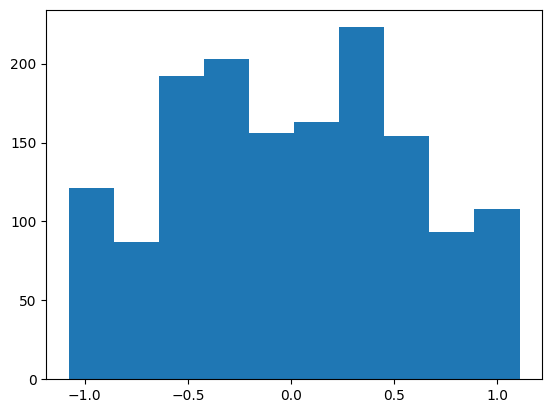

In [ ]:
plt.hist(data.iloc[:, 0])
plt.show()

## Activity 2.01: Using Data Visualization to Aid the Pre-processing Process
The marketing team of your company wants to know about the different profiles of
the clients so that it can focus its marketing effort on the individual needs of each
profile. To do so, it has provided your team with a list of 440 pieces of previous
sales data. Your first task is to pre-process the data. You will present your findings
using data visualization techniques in order to help your colleagues understand the
decisions you took in that process. You should load a CSV dataset using pandas and
use data visualization tools to help with the pre-processing process. The following
steps will guide you on how to do this:

In [ ]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Check for outliers in your DataFrame. If present, handle the outliers and support
your decision with data visualization.

**Note**
Mark all the values that are three standard deviations away from the mean
as outliers.

In [ ]:
outliers = {}
for i in range(df.shape[1]):
  min_t = df[df.columns[i]].mean() - (3*df[df.columns[i]].std())

  max_t = df[df.columns[i]].mean() + (3*df[df.columns[i]].std())

  count = 0
  for j in df[df.columns[i]]:
    if j < min_t or j > max_t:
      count += 1

  outliers[df.columns[i]] = [count, df.shape[0] - count]

print(outliers)

{'Channel': [0, 440], 'Region': [0, 440], 'Fresh': [7, 433], 'Milk': [9, 431], 'Grocery': [7, 433], 'Frozen': [6, 434], 'Detergents_Paper': [10, 430], 'Delicassen': [4, 436]}


As you can see from the preceding screenshot, some features do have outliers.
Considering that there are only a few outliers for each feature, there are two
possible ways to handle them.

First, you could decide to delete the outliers. This decision can be supported by
displaying a histogram for the features with outliers:

Check for outliers in your DataFrame. If present, handle the outliers and support
your decision with data visualization.

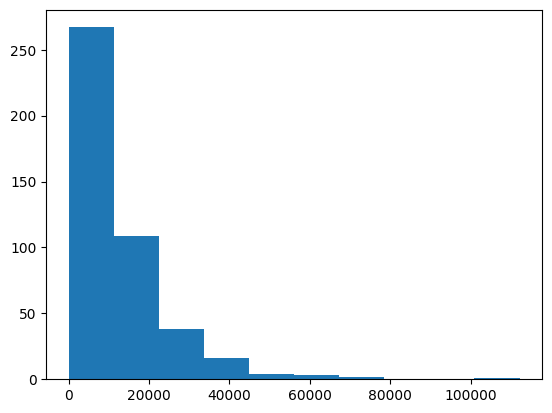

In [ ]:
plt.hist(df['Fresh'])
plt.show()

For instance, for the feature named Fresh, it can be seen through the
histogram that most instances are represented by values below 40,000. Hence,
deleting the instances above that value will not affect the performance of
the model.

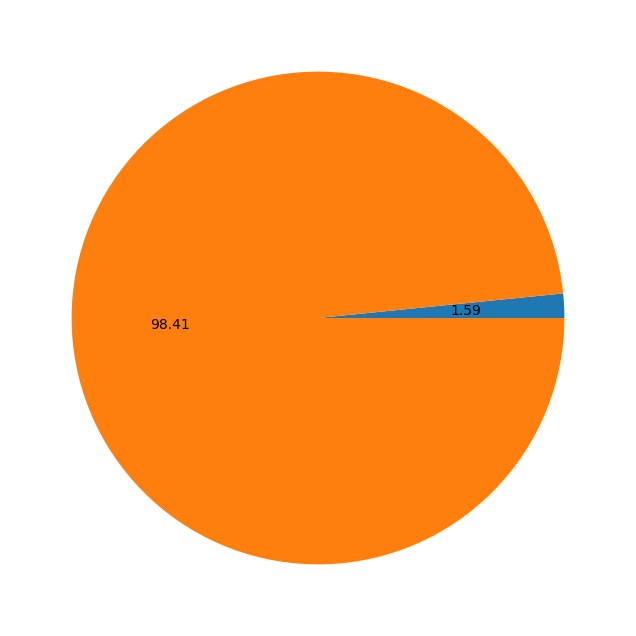

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(outliers['Fresh'], autopct='%.2f')
plt.show()

On the other hand, the second approach would be to leave the outliers as they
are, considering that they do not represent a large portion of the dataset, which
can be supported with data visualization tools using a pie chart. Refer to the
code and the output that follows:

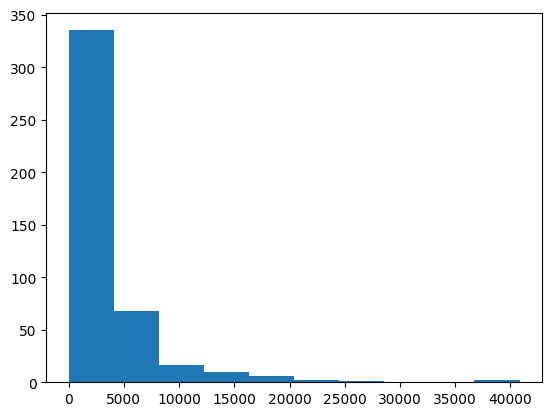

In [ ]:
plt.hist(df['Detergents_Paper'])
plt.show()

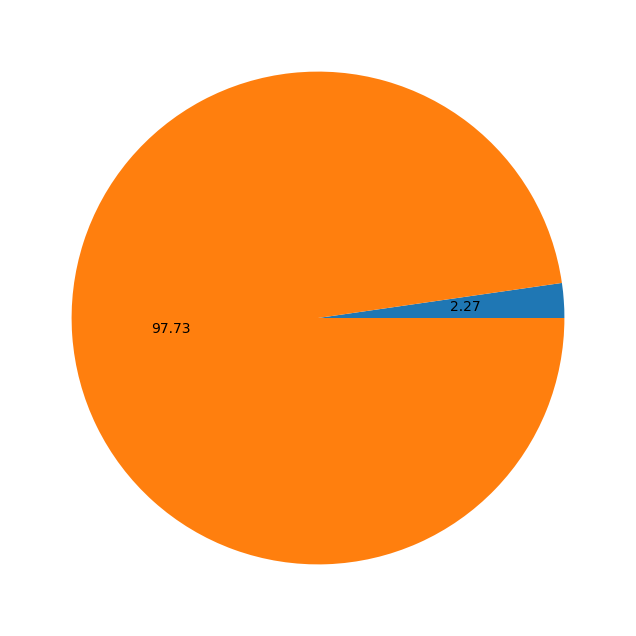

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(outliers['Detergents_Paper'], autopct='%.2f')
plt.show()

The preceding diagram shows the participation of the outliers from the
**Detergents_papers** feature, which was the feature with the most outliers in
the dataset. Only 2.27% of the values are outliers, a value so low that it will not
affect the performance of the model either.

Rescale the data using the formula for normalization or standardization.

Standardization tends to work better for clustering purposes

For this solution, the formula for standardization has been used. Note that the
formula can be applied to the entire dataset at once, instead of being applied
individually to each feature:

In [ ]:
data_standardized = (df - df.mean())/df.std()
data_standardized.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.447005,0.589997,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,1.447005,0.589997,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,1.447005,0.589997,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,-0.689512,0.589997,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,1.447005,0.589997,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870


You have successfully pre-processed the Wholesale Customers dataset, which will
be used in subsequent activities to build a model that will classify these observations
into clusters.

## k-means Algorithm
The k-means algorithm is used to model data without a labeled class. It involves
dividing the data into K number of subgroups. The classification of data points into
each group is done based on similarity, as explained previously (refer to the Clustering
Types section), which, for this algorithm, is measured by the distance from the center
(centroid) of the cluster. The final output of the algorithm is each data point linked to
the cluster it belongs to and the centroid of that cluster, which can be used to label
new data in the same clusters.

The centroid of each cluster represents a collection of features that can be used to
define the nature of the data points that belong there.

## Understanding the Algorithm
The k-means algorithm works through an iterative process that involves the
following steps:

1. Based on the number of clusters defined by the user, the centroids are
generated either by setting initial estimates or by randomly choosing them from
the data points. This step is known as initialization.

2. All the data points are assigned to the nearest cluster in the data space
by measuring their respective distances from the centroid, known as the
assignment step. The objective is to minimize the squared Euclidean distance,
which can be defined by the following formula:

**min dist(c,x)2**
Here, c represents a centroid, x refers to a data point, and dist() is the
Euclidean distance.

3. Centroids are calculated again by computing the mean of all the data points
belonging to a cluster. This step is known as the update step.

Steps 2 and 3 are repeated in an iterative process until a criterion is met. This criterion
can be as follows:

• The number of iterations defined.

• The data points do not change from cluster to cluster.

• The Euclidean distance is minimized.

The algorithm is set to always arrive at a result, even though this result may converge
to a local or a global optimum.
The k-means algorithm receives several parameters as inputs to run the model.
The most important ones to consider are the initialization method **(init)** and the
number of clusters **(K)**.

## Initialization Methods
An important input of the algorithm is the initialization method to be used to
generate the initial centroids. The initialization methods allowed by the scikit-learn
library are explained as follows:

• **k-means++:** This is the default option. Centroids are chosen randomly from
the set of data points, considering that centroids must be far away from one
another. To achieve this, the method assigns a higher probability of being a
centroid to those data points that are farther away from other centroids.

• **random:** This method chooses K observations randomly from the data points as
the initial centroids.

## Choosing the Number of Clusters
As we discussed previously, the number of clusters that the data is to be
divided into is set by the user; hence, it is important to choose the number of
clusters appropriately.

One of the metrics that's used to measure the performance of the k-means algorithm
is the mean distance of the data points from the centroid of the cluster that they
belong to. However, this measure can be counterproductive as the higher the
number of clusters, the smaller the distance between the data points and its centroid,
which may result in the number of clusters (K) matching the number of data points,
thereby harming the purpose of clustering algorithms.

To avoid this, you can plot the average distance between the data points and the
cluster centroid against the number of clusters. The appropriate number of clusters
corresponds to the breaking point of the plot, where the rate of decrease drastically
changes. In the following diagram, the dotted circle represents the ideal number
of clusters:

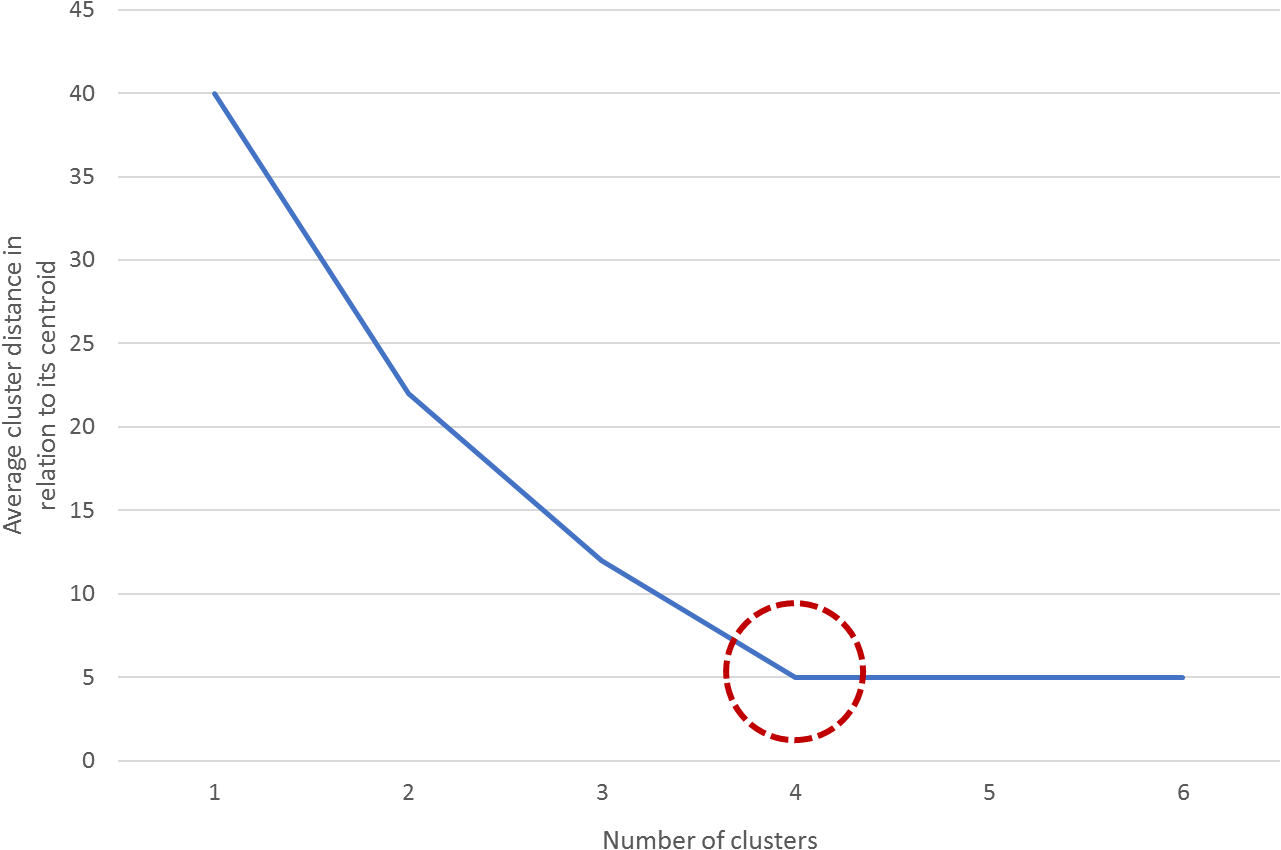

A graph demonstrating how to estimate the breaking point

## Exercise 2.02: Importing and Training the k-means Algorithm over a Dataset

Import the k-means algorithm from scikit-learn as follows:

In [ ]:
from sklearn.cluster import KMeans

To choose the value for K (that is, the ideal number of clusters), calculate the
average distance of data points from their cluster centroid in relation to the
number of clusters. Use 20 as the maximum number of clusters for this exercise.
The following is a snippet of the code for this:

In [ ]:
ideal_k = []
for i in range(1, 21):
  est_kmeans = KMeans(n_clusters=i, random_state=0)
  est_kmeans.fit(data)
  ideal_k.append([i,est_kmeans.inertia_])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

**Note**
The random_state argument is used to ensure reproducibility of
results by making sure that the random initialization of the algorithm
remains constant.

First, create the variables that will store the values as an array and name it
**ideal_k**. Next, perform a **for** loop that starts at one cluster and goes as high
as desired (considering that the maximum number of clusters must not exceed
the total number of instances).

For the previous example, there was a limitation of a maximum of 20 clusters
to be created. As a consequence of this limitation, the **for** loop goes from 1 to
20 clusters.

Inside the **for** loop, instantiate the algorithm with the number of clusters
to be created, and then fit the data to the model. Next, append the pairs
of data (number of clusters, average distance to the centroid) to the list
named **ideal_k.**

The average distance to the centroid does not need to be calculated as the
model outputs it under the **inertia_** attribute, which can be called out as
**[model_name].inertia_**.

Convert the **ideal_k** list into a NumPy array so that it can be plotted. Use the
following code snippet:

In [ ]:
ideal_k = np.array(ideal_k)
ideal_k

array([[  1.        , 947.06937502],
       [  2.        , 601.17489624],
       [  3.        , 363.71660347],
       [  4.        , 256.50000503],
       [  5.        , 201.87175449],
       [  6.        , 169.87704214],
       [  7.        , 151.6211158 ],
       [  8.        , 135.32137543],
       [  9.        , 118.85259968],
       [ 10.        , 101.99531973],
       [ 11.        ,  87.59929399],
       [ 12.        ,  75.95363635],
       [ 13.        ,  63.79890373],
       [ 14.        ,  55.80951181],
       [ 15.        ,  48.49299697],
       [ 16.        ,  42.98636922],
       [ 17.        ,  38.80607714],
       [ 18.        ,  34.6180653 ],
       [ 19.        ,  31.66287937],
       [ 20.        ,  29.1694692 ]])

Plot the relations that you calculated in the preceding steps to find the ideal K to
input to the final model:

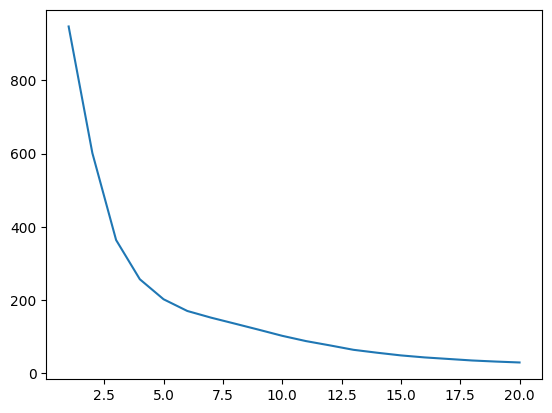

In [ ]:
plt.plot(ideal_k[:,0], ideal_k[:,1])
plt.show()

In the preceding plot, the x-axis represents the number of clusters, while the
y-axis refers to the calculated average distance of each point in a cluster from
their centroid.

The breaking point of the plot is around 5.

Train the model with K=5. Use the following code:

In [ ]:
est_kmeans = KMeans(n_clusters=5, random_state=0)
est_kmeans.fit(data)
pred_kmeans = est_kmeans.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pred_kmeans

array([2, 2, 0, ..., 2, 2, 3], dtype=int32)

The first line instantiates the model with 5 as the number of clusters. Then, the
data is fit to the model. Finally, the model is used to assign a cluster to each
data point.

Plot the results from the clustering of data points into clusters:

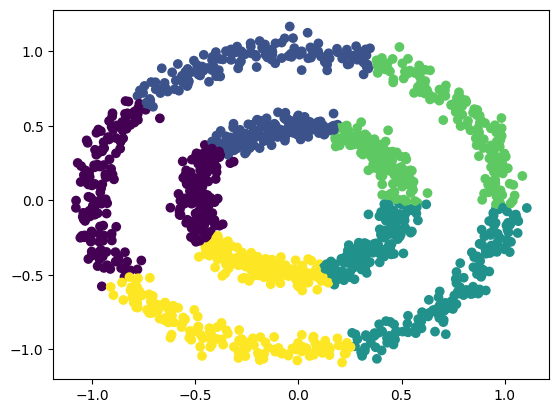

In [ ]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=pred_kmeans)
plt.show()

Since the dataset only contains two features, each feature is passed as input to
the scatter plot function, meaning that each feature is represented by an axis.
Additionally, the labels that were obtained from the clustering process are used
as the colors to display the data points. Thus, each data point is located in the
data space based on the values of both features, and the colors represent the
clusters that were formed.

**Note**

For datasets with over two features, the visual representation of clusters
is not as explicit as that shown in the preceding screenshot. This is mainly
because the location of each data point (observation) in the data space is
based on the collection of all of its features, and visually, it is only possible
to display up to three features.

In conclusion, the k-means algorithm seeks to divide the data into K number of
clusters, K being a parameter set by the user. Data points are grouped together
based on their proximity to the centroid of a cluster, which is calculated by an
iterative process.


The initial centroids are set according to the initialization method that's been defined.
Then, all the data points are assigned to the clusters with the centroid closer to their
location in the data space, using the Euclidean distance as a measure. Once the data
points have been divided into clusters, the centroid of each cluster is recalculated as
the mean of all data points. This process is repeated several times until a stopping
criterion is met.

## Activity 2.02: Applying the k-means Algorithm to a Dataset

In [ ]:
data_standardized.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.447005,0.589997,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,1.447005,0.589997,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,1.447005,0.589997,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,-0.689512,0.589997,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,1.447005,0.589997,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
ideal_k = []
for i in range(1, 21):
  est_kmeans = KMeans(n_clusters=i, random_state=0)
  est_kmeans.fit(data_standardized)
  ideal_k.append([i,est_kmeans.inertia_])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
ideal_k

[[1, 3512.000000000002],
 [2, 2593.477864903059],
 [3, 2144.3992199576182],
 [4, 1847.6321430192158],
 [5, 1542.785597092615],
 [6, 1311.6921189265258],
 [7, 1170.3446220280807],
 [8, 1048.2792565770403],
 [9, 976.5276628392621],
 [10, 927.1602788308355],
 [11, 849.8649141104709],
 [12, 801.636860749385],
 [13, 765.632973533253],
 [14, 709.7727934429397],
 [15, 686.060011898663],
 [16, 653.0056708004045],
 [17, 622.6162742341922],
 [18, 600.233244265204],
 [19, 574.2352357057064],
 [20, 538.6393890332754]]

In [ ]:
ideal_k = np.array(ideal_k)
ideal_k

array([[1.00000000e+00, 3.51200000e+03],
       [2.00000000e+00, 2.59347786e+03],
       [3.00000000e+00, 2.14439922e+03],
       [4.00000000e+00, 1.84763214e+03],
       [5.00000000e+00, 1.54278560e+03],
       [6.00000000e+00, 1.31169212e+03],
       [7.00000000e+00, 1.17034462e+03],
       [8.00000000e+00, 1.04827926e+03],
       [9.00000000e+00, 9.76527663e+02],
       [1.00000000e+01, 9.27160279e+02],
       [1.10000000e+01, 8.49864914e+02],
       [1.20000000e+01, 8.01636861e+02],
       [1.30000000e+01, 7.65632974e+02],
       [1.40000000e+01, 7.09772793e+02],
       [1.50000000e+01, 6.86060012e+02],
       [1.60000000e+01, 6.53005671e+02],
       [1.70000000e+01, 6.22616274e+02],
       [1.80000000e+01, 6.00233244e+02],
       [1.90000000e+01, 5.74235236e+02],
       [2.00000000e+01, 5.38639389e+02]])

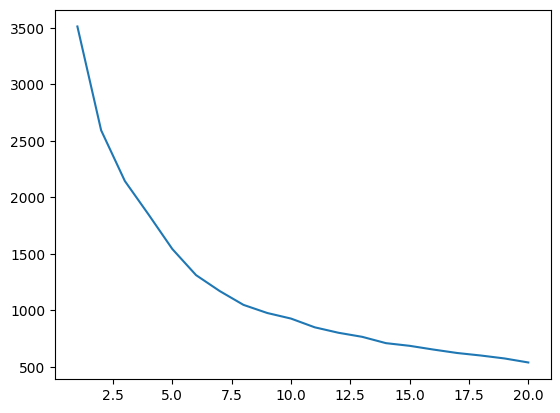

In [ ]:
plt.plot(ideal_k[:,0], ideal_k[:,1])
plt.show()

In [ ]:
est_kmeans = KMeans(n_clusters=6, random_state=0)
est_kmeans.fit(data_standardized)
pred_kmeans = est_kmeans.predict(data_standardized)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
pred_kmeans

array([3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0,
       5, 1, 3, 3, 0, 0, 3, 5, 0, 0, 0, 5, 0, 3, 5, 3, 3, 5, 5, 0, 3, 3,
       3, 3, 3, 1, 3, 3, 0, 0, 5, 3, 0, 0, 1, 3, 0, 0, 3, 1, 3, 3, 0, 1,
       0, 3, 0, 0, 5, 5, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 1, 1, 5,
       0, 0, 0, 0, 1, 5, 3, 0, 3, 0, 0, 0, 3, 3, 3, 5, 0, 0, 3, 3, 3, 3,
       0, 3, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 5, 0, 3, 0, 5, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3,
       5, 0, 0, 0, 0, 5, 0, 4, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 5, 3,
       2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 1, 2, 2, 3, 2, 3, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2,
       3, 2, 3, 2, 3, 2, 2, 2, 2, 5, 0, 0, 5, 5, 0, 3, 0, 3, 5, 5, 5, 5,
       0, 0, 0, 5, 0, 0, 0, 3, 2, 3, 2, 3, 3, 2, 3,

In [ ]:
df.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


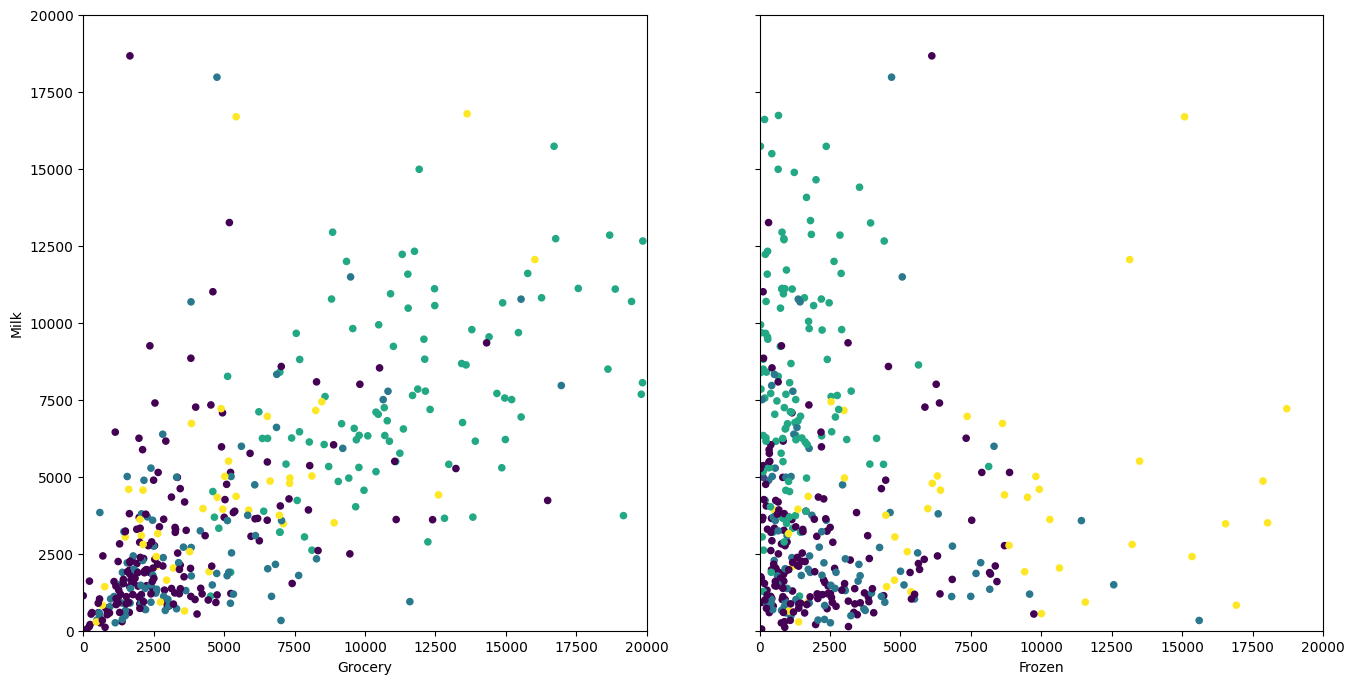

In [ ]:
plt.subplots(1,2,sharex='col',sharey='row', figsize=(16,8))
plt.scatter(df.iloc[:, 5], df.iloc[:, 3], c=pred_kmeans, s=20)

plt.xlim([0, 20000])
plt.ylim([0, 20000])
plt.xlabel('Frozen')

plt.subplot(1,2,1)
plt.scatter(df.iloc[:, 4], df.iloc[:, 3], c=pred_kmeans, s=20)
plt.xlim([0, 20000])
plt.ylim([0, 20000])
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()

The **subplots()** function from **matplotlib** has been used to plot two scatter
graphs at a time. For each graph, the axes represent the values for a selected feature
in relation to the values of another feature. As can be seen from the plots, there is no
obvious visual relation due to the fact that we are only able to use two of the eight
features present in the dataset. However, the final output of the model creates six
different clusters that represent six different profiles of clients.

## Mean-Shift Algorithm
The **mean-shift** algorithm works by assigning each data point a cluster based on the
density of the data points in the data space, also known as the mode in a distribution
function. Contrary to the k-means algorithm, the mean-shift algorithm does not
require you to specify the number of clusters as a parameter.

The algorithm works by modeling the data points as a distribution function, where
high-density areas (high concentration of data points) represent high peaks. Then,
the general idea is to shift each data point until it reaches its nearest peak, which
becomes a cluster.

## Understanding the Algorithm
The first step of the mean-shift algorithm is to represent the data points as a
density distribution. To do so, the algorithm builds upon the idea of **Kernel Density
Estimation (KDE)**, which is a method that's used to estimate the distribution of a set
of data:

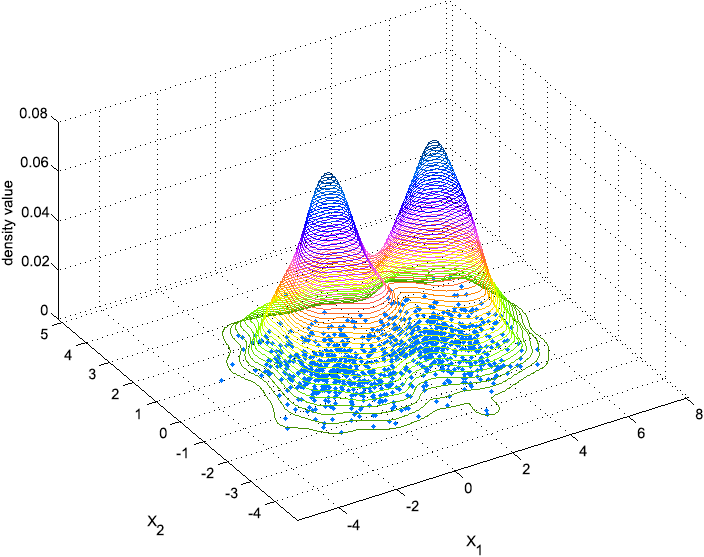

In the preceding diagram, the dots at the bottom of the shape represent the data
points that the user inputs, while the cone-shaped lines represent the estimated
distribution of the data points. The peaks (high-density areas) will be the clusters.
The process of assigning data points to each cluster is as follows:

1. A window of a specified size (bandwidth) is drawn around each data point.

2. The mean of the data inside the window is computed.

3. The center of the window is shifted to the mean.

Steps 2 and 3 are repeated until the data point reaches a peak, which will determine
the cluster that it belongs to.

The bandwidth value should be coherent with the distribution of the data points in
the dataset. For example, for a dataset normalized between 0 and 1, the bandwidth
value should be within that range, while for a dataset with all values between 1,000
and 2,000, it would make more sense to have a bandwidth between 100 and 500.

In the following diagram, the estimated distribution is represented by the lines, while
the data points are the dots. In each of the boxes, the data points shift to the nearest
peak. All the data points in a certain peak belong to that cluster:

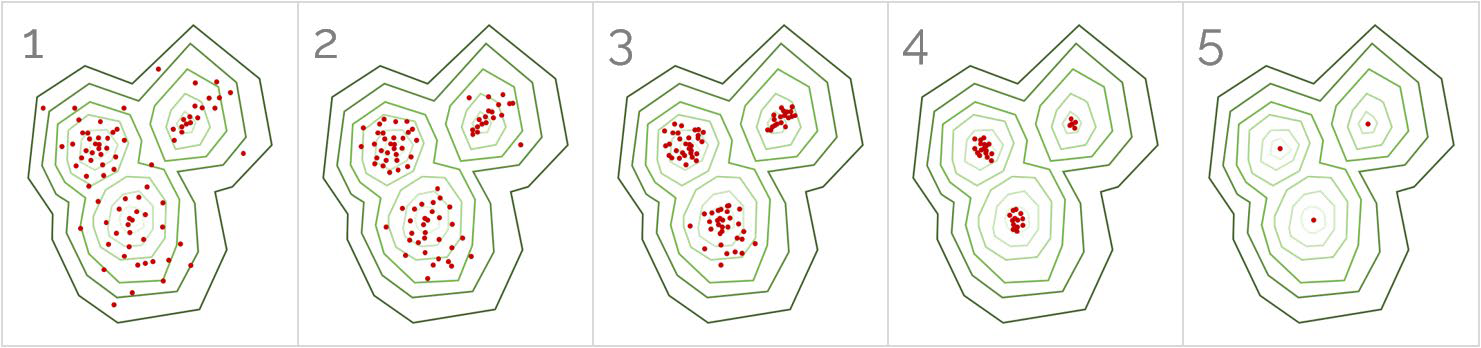

The number of shifts that a data point has to make to reach a peak depends on its
bandwidth (the size of the window) and its distance from the peak.

**Note**

To explore all the parameters of the mean-shift algorithm in scikit-learn,
visit http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.
html.

## Exercise 2.03: Importing and Training the Mean-Shift Algorithm over a Dataset

Import the k-means algorithm class from scikit-learn as follows:

In [ ]:
from sklearn.cluster import MeanShift

Train the model with a bandwidth of 0.5:

In [ ]:
data

,0,1
0,0.393992,-0.416376
1,0.528243,-0.828242
2,-0.740158,0.607730
3,-0.971016,0.316821
4,0.018693,-0.605288
...,...,...
1495,0.085197,-0.463028
1496,0.890820,0.003483
1497,0.223768,-0.419122
1498,0.221189,-0.510314


In [ ]:
est_meanshift = MeanShift(bandwidth=0.5)

In [ ]:
est_meanshift.fit(data)
pred_meanshift = est_meanshift.predict(data)

First, the model is instantiated with a bandwidth of 0.5. Next, the model is fit to
the data. Finally, the model is used to assign a cluster to each data point.

Considering that the dataset contains values ranging from −1 to 1, the bandwidth
value should not be above 1. The value of 0.5 was chosen after trying out other
values, such as 0.1 and 0.9.

**Note**
Take into account the fact that the bandwidth is a parameter of the
algorithm and that, as a parameter, it can be fine-tuned to arrive at the
best performance. This fine-tuning process will be covered in Sheet-3,
Supervised Learning – Key Steps.

Plot the results from clustering the data points into clusters:

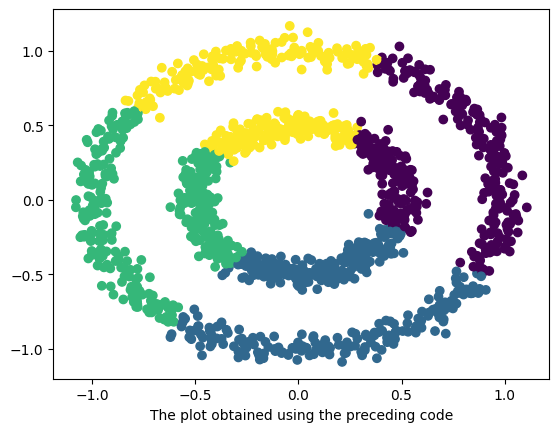

In [ ]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=pred_meanshift)
plt.xlabel('The plot obtained using the preceding code')
plt.show()

Again, as the dataset only contains two features, both are passed as inputs to
the scatter function, which become the values of the axes. Also, the labels that
were obtained from the clustering process are used as the colors to display the
data points.

The total number of clusters that have been created is four.

You have successfully imported and trained the mean-shift algorithm.

In conclusion, the mean-shift algorithm starts by drawing the distribution function
that represents the set of data points. This process consists of creating peaks in highdensity
areas, while leaving the areas with a low density flat.

Following this, the algorithm proceeds to classify the data points into clusters by
shifting each point slowly and iteratively until it reaches a peak, which becomes
its cluster.

## Activity 2.03: Applying the Mean-Shift Algorithm to a Dataset

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
est_meanshift = MeanShift(bandwidth=0.4)
est_meanshift.fit(data_standardized)
pred_meanshift = est_meanshift.predict(data_standardized)

In [ ]:
labels=est_meanshift.labels_
labels

array([ 62,  75,  76,  26,  45,  19,   9,  12,   5,  77,  90,  61,  39,
        48,  42,   0,  13, 211,  51, 209,  53,   0, 165,  41,  44,  55,
         4,   1,  86, 156, 186,   5,  25, 169,   0, 102, 168,  58,  84,
       151, 181, 183,  68, 104,  70,  82,  92,  35,  66,  83, 210,   5,
        36, 105, 173,   5,  87,  21, 185,  28,   9,  38,  73,  20, 210,
       108,  30,  49, 220,   0, 194, 187, 215,  50,  12,  16, 224,  64,
         4,   5,   0,  14,  69,   1,   9,  56,  43, 155, 208, 180,   4,
        10,  71, 200,  79,   5, 110,   0,   0,   3,  65,  98,  93, 152,
         1,   4,  23,  20,  97,  99,   4,  63, 184,   4,   1,   4,   4,
         5,  16,   3,   1,   0,   4,  67,  15, 149,  10,  47, 228, 158,
         3,   0, 185,   0,   0,   0, 213, 219, 196,   5, 190, 167, 161,
       208, 185,  46,   0,   5,   3, 164,   1,   0,   1, 216,   0,  95,
        89,   1,  13,  14,  13,   4,   1,  80,  81,  57,  22,   5,   0,
         0,  14, 106, 222,  24, 226,  13, 154, 198, 202, 217, 19

In [ ]:
centers = est_meanshift.cluster_centers_
centers

array([[-0.68951221,  0.58999669, -0.63271148, ..., -0.41524304,
        -0.540703  , -0.36956562],
       [-0.68951221,  0.58999669,  0.53046002, ..., -0.14261141,
        -0.5370955 , -0.27565293],
       [-0.68951221, -1.99307339, -0.42533952, ..., -0.31910572,
        -0.55169093, -0.38819795],
       ...,
       [-0.68951221, -1.99307339, -0.82731285, ..., -0.24984829,
         0.10476553, -0.25490902],
       [-0.68951221, -1.99307339, -0.9027438 , ..., -0.53617033,
        -0.40426846, -0.53433115],
       [-0.68951221, -1.99307339, -0.9081995 , ..., -0.52381111,
        -0.58485283, -0.17193342]])

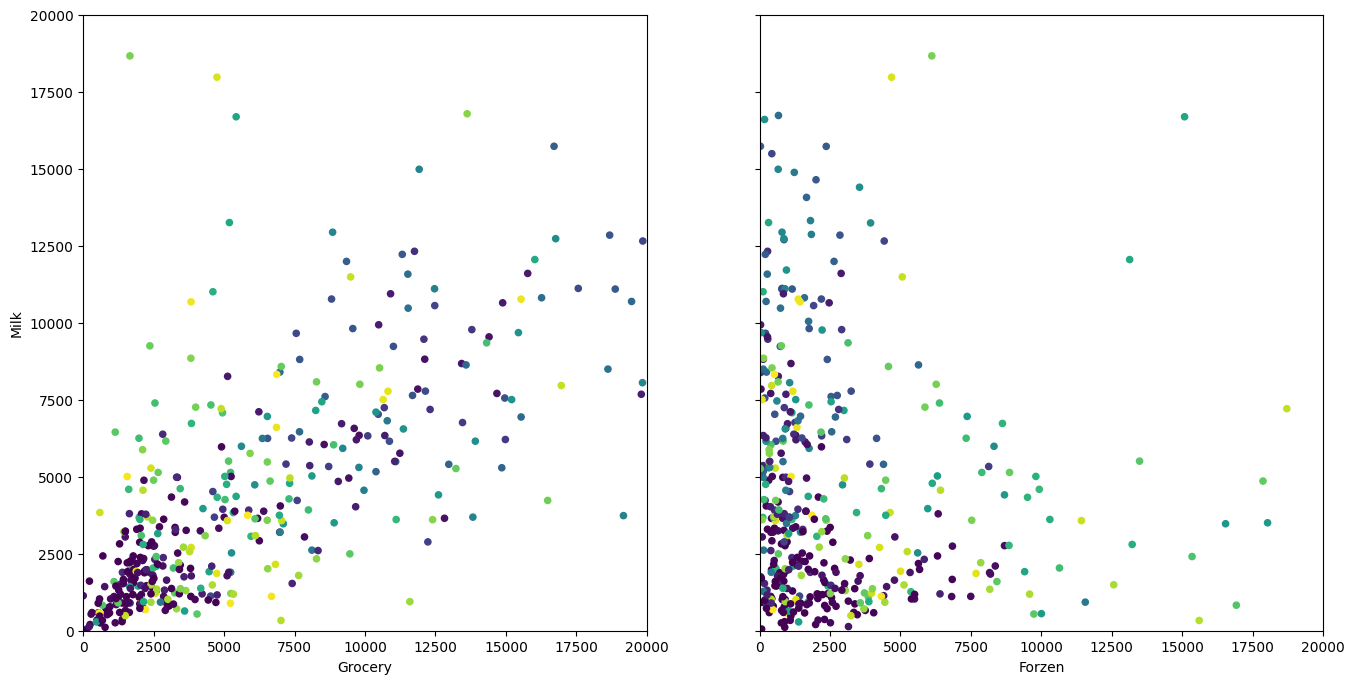

In [ ]:
plt.subplots(1,2,sharex='col', sharey='row', figsize=(16,8))
plt.scatter(df.iloc[:,5], df.iloc[:,3], c=pred_meanshift, s=20)
plt.xlim([0, 20000])
plt.ylim([0, 20000])
plt.xlabel('Forzen')

plt.subplot(1,2,1)
plt.scatter(df.iloc[:,4], df.iloc[:,3], c=pred_meanshift, s=20)
plt.xlim([0, 20000])
plt.ylim([0, 20000])
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()

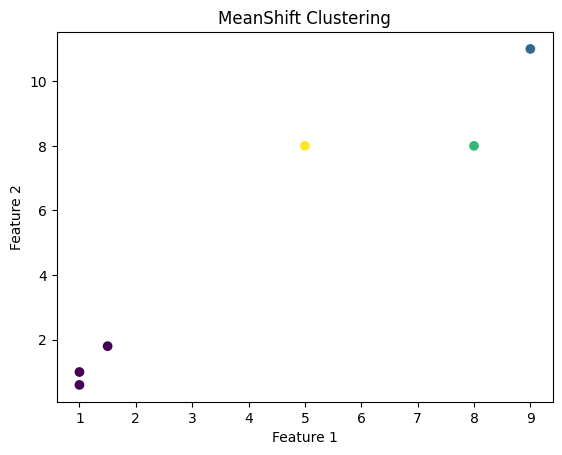

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt

# Generate a sample dataset
X = np.array([[1, 1], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

# Create a MeanShift object with bandwidth set to 2
ms = MeanShift(bandwidth=2)

# Fit the MeanShift object to the data
ms.fit(X)

# Retrieve the cluster labels and cluster centers
labels = ms.labels_
centers = ms.cluster_centers_

# Plot the data points with colors corresponding to their cluster labels
plt.scatter(X[:,0], X[:,1], c=labels)
plt.title('MeanShift Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



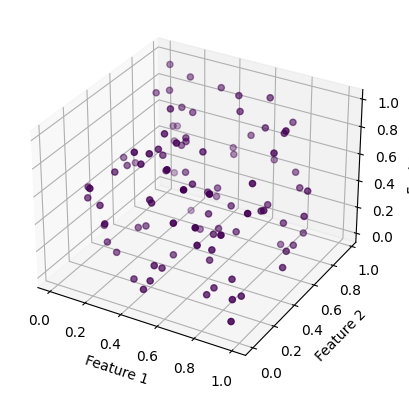

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Generate a sample dataset with 3 features
X = np.random.rand(100, 3)

# Create a MeanShift object with bandwidth set to 0.5
ms = MeanShift(bandwidth=0.5)

# Fit the MeanShift object to the data
ms.fit(X)

# Retrieve the cluster labels
labels = ms.labels_

# Create a 3D scatter plot with cluster assignments
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()


## DBSCAN Algorithm
The **density-based spatial clustering of applications with noise (DBSCAN)**
algorithm groups together points that are close to each other (with many neighbors)
and marks those points that are further away with no close neighbors as outliers.

According to this, and as its name states, the algorithm classifies data points based on
the density of all data points in the data space.

## Understanding the Algorithm

The DBSCAN algorithm requires two main parameters: epsilon and the minimum
number of observations.

**Epsilon**, also known as **eps**, is the maximum distance that defines the radius
within which the algorithm searches for neighbors. The **minimum number of
observations**, on the other hand, refers to the number of data points required to
form a high-density area (**min_samples**). However, the latter is optional in scikitlearn
as the default value is set to $5$:

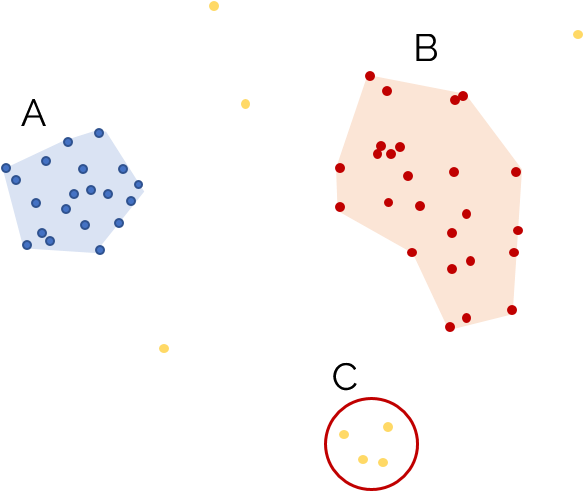

<Center>Figure 2.12: An illustration of how the DBSCAN algorithm classifies data into clusters

In the preceding diagram, the dots to the left are assigned to cluster **A**, while the dots
to the upper right are assigned to cluster **B**. Moreover, the dots at the bottom right
**(C)** are considered to be outliers, as well as any other data point in the data space, as
they do not meet the required parameters to belong to a high-density area (that is,
the minimum number of samples is not met, which, in this example, was set to $5$).

****
**Note:**

Similar to the bandwidth parameter, the epsilon value should be coherent
with the distribution of the data points in the dataset, considering that it
represents a radius around each data point.
****

According to this, each data point can be classified as follows:

- **A core point:** A point that has at least the minimum number of data points
within its **eps** radius.

- **A border point:** A point that is within the eps radius of a core point, but does not
have the required number of data points within its own radius.

- **A noise point:** All points that do not meet the preceding descriptions.

****
**Note:**

To explore all the parameters of the DBSCAN algorithm in scikit-learn, visit
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html.
****

##Exercise 2.04: Importing and Training the DBSCAN Algorithm over a Dataset

This exercise discusses how to import and train the DBSCAN algorithm over a
dataset. We will be using the circles dataset from the previous exercises. Perform the
following steps to complete this exercise:

1. Import the DBSCAN algorithm class from scikit-learn as follows:

In [ ]:
from sklearn.cluster import DBSCAN

2. Train the model with epsilon equal to 0.1:

In [ ]:
est_dbscan = DBSCAN(eps=0.1)
pred_dbscan = est_dbscan.fit_predict(data)

First, the model is instantiated with **eps** of $0.1.$ Then, we use the **fit_
predict()** function to fit the model to the data and assign a cluster to each
data point. This bundled function, which includes both the **fit** and **predict**
methods, is used because the DBSCAN algorithm in scikit-learn does not contain
a **predict()** method alone.

Again, the value of $0.1$ was chosen after trying out all other possible values.

3. Plot the results from the clustering process:

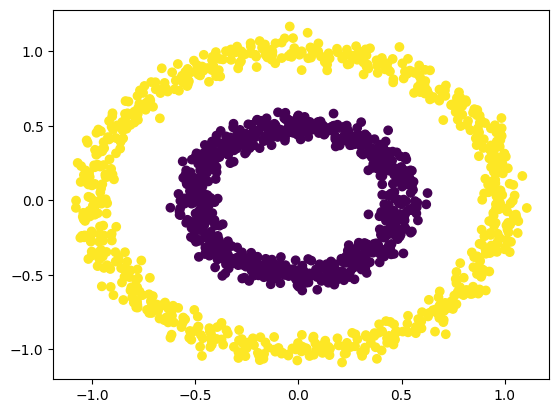

In [ ]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=pred_dbscan)
plt.show()

<Center>Figure 2.13: The plot obtained with the preceding code

As before, both features are passed as inputs to the scatter function. Also, the
labels that were obtained from the clustering process are used as the colors to
display the data points.

The total number of clusters that have been created is two.

As you can see, the total number of clusters created by each algorithm is
different. This is because, as mentioned previously, each of these algorithms
defines similarity differently and, as a consequence, each interprets the
data differently.

Due to this, it is crucial to test different algorithms over the data to compare the
results and define which one generalizes better to the data. The following topic
will explore some methods that we can use to evaluate performance to help
choose an algorithm.

You have successfully imported and trained the DBSCAN algorithm.

In conclusion, the DBSCAN algorithm bases its clustering classification on the density
of data points in the data space. This means that clusters are formed by data points
with many neighbors. This is done by considering that core points are those that
contain a minimum number of neighbors within a set radius, border points are
those that are located inside the radius of a core point but do not have the minimum
number of neighbors within their own radius, and noise points are those that do not
meet any of the specifications.

#Activity 2.04: Applying the DBSCAN Algorithm to the Dataset

You will apply the DBSCAN algorithm to the dataset as well. This is basically because it
is good practice to test out different algorithms when solving a data problem in order
to choose the one that best fits the data, considering that there is no one model
that performs well for all data problems. Using the previously loaded Wholesale
Consumers dataset, apply the DBSCAN algorithm to the data and classify the data
into clusters. Perform the following steps:

1. Train the model and assign a cluster to each data point in your dataset. Plot
the results.

First, import the algorithm class:

In [ ]:
from sklearn.cluster import DBSCAN

To train the model, use the following code:

In [ ]:
est_dbscan = DBSCAN(eps=0.8)
pred_dbscan = est_dbscan.fit_predict(data_standardized)

The model was trained using an epsilon value of $0.8.$ However, feel free to test
other values to see how the results change.

Finally, plot the results of the clustering process. As the dataset contains
eight different features, choose two features to draw at once, as shown in the
following code:

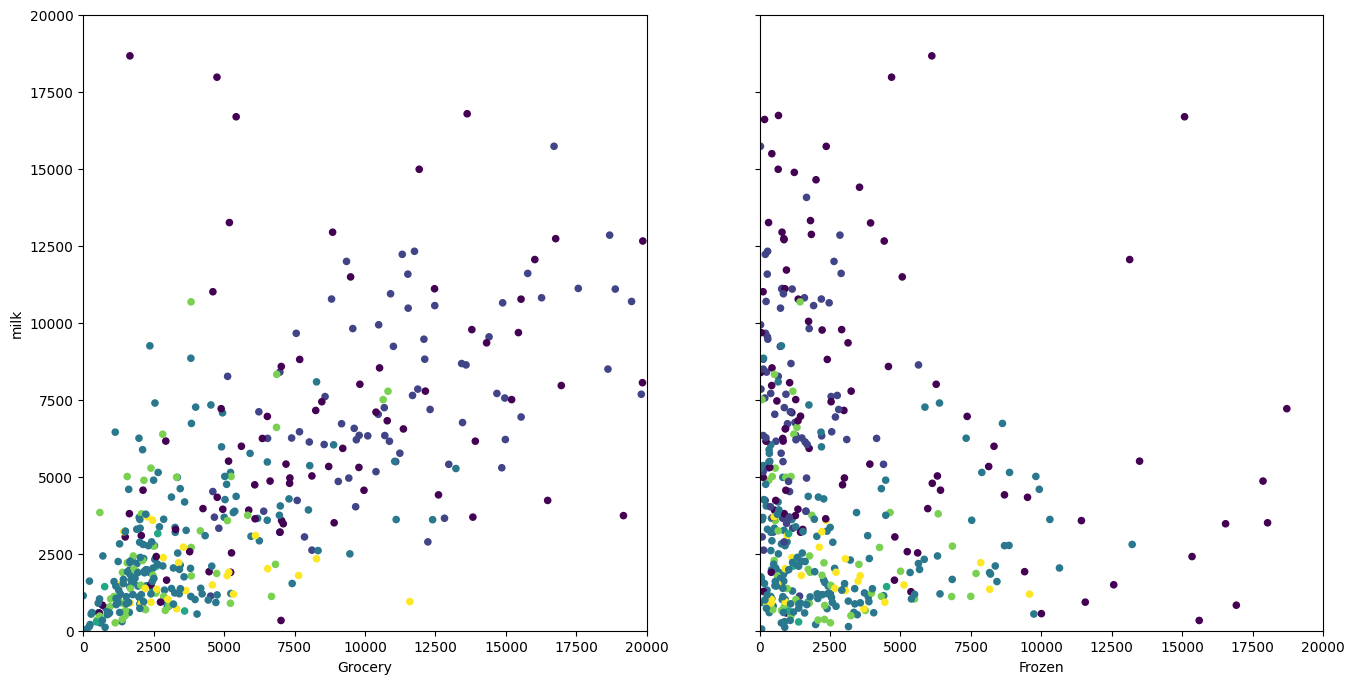

In [ ]:
plt.subplots(1, 2, sharex='col', \
             sharey='row', figsize=(16,8))

plt.scatter(df.iloc[:,5], df.iloc[:,3],\
            c=pred_dbscan, s=20)
plt.xlim([0, 20000])
plt.ylim([0,20000])
plt.xlabel('Frozen')
plt.subplot(1, 2, 1)
plt.scatter(df.iloc[:,4], df.iloc[:,3],\
            c=pred_dbscan, s=20)
plt.xlim([0, 20000])
plt.ylim([0, 20000])
plt.xlabel('Grocery')
plt.ylabel('milk')
plt.show()

<Center>Figure 2.21: Example plots obtained at the end of the clustering process

The visualization of clusters will differ based on the epsilon and the features
chosen to be plotted.

##Evaluating the Performance of Clusters

After applying a clustering algorithm, it is necessary to evaluate how well the
algorithm has performed. This is especially important when it is difficult to visually
evaluate the clusters; for example, when there are several features.

Usually, with supervised algorithms, it is easy to evaluate their performance by simply
comparing the prediction of each instance with its true value (class). On the other
hand, when dealing with unsupervised models (such as clustering algorithms), it is
necessary to pursue other strategies.

In the specific case of clustering algorithms, it is possible to evaluate performance by
measuring the similarity of the data points that belong to the same cluster.

##Available Metrics in Scikit-Learn

Scikit-learn allows its users to use three different scores for evaluating the
performance of unsupervised clustering algorithms. The main idea behind these
scores is to measure how well-defined the cluster's edges are, instead of measuring
the dispersion within a cluster. Hence, it is worth mentioning that the scores do not
take into account the size of each cluster.

The two most commonly used scores for measuring unsupervised clustering tasks are
explained as follows:

- The **Silhouette Coefficient Score** calculates the mean distance between each
point and all the other points of a cluster $(a)$, as well as the mean distance
between each point and all the other points of its nearest clusters $(b)$. It relates
both of them according to the following equation:

In [ ]:
 # s = (b - a) / max(a,b)

The result of the score is a value between -1 and 1. The lower the value, the
worse the performance of the algorithm. Values around 0 will imply overlapping
of clusters. It is also important to clarify that this score does not work very well
when using density-based algorithms such as DBSCAN.

- The **Calinski–Harabasz Index** was created to measure the relationship between
the variance of each cluster and the variance of all clusters. More specifically, the
variance of each cluster is the mean square error of each point with respect to
the centroid of that cluster. On the other hand, the variance of all clusters refers
to the overall inter-cluster variance.

The higher the value of the Calinski–Harabasz Index, the better the definition
and separation of the clusters. There is no acceptable cut-off value, so the
performance of the algorithms using this index is evaluated through comparison,
where the algorithm with the highest value is the one that performs best. As with
the Silhouette Coefficient, this score does not perform well on density-based
algorithms such as DBSCAN.

Unfortunately, the scikit-learn library does not contain other methods for effectively
measuring the performance of density-based clustering algorithms, and although the
methods mentioned here may work in some cases to measure the performance of
these algorithms, when they do not, there is no other way to measure this other than
via manual evaluation.

However, it is worth mentioning that there are additional performance measures
in scikit-learn for cases where a ground truth label is known, known as supervised
clustering; for instance, when performing clustering over a set of observations of
journalism students who have already signed up for a major or a specialization area.
If we were to use their demographic information as well as some student records
to categorize them into clusters that represent their choice of major, it would be
possible to compare the predicted classification with the actual classification.

Some of these measures are as follows:

- **Homogeneity score:** This score is based on the premise that a clustering task is
homogenous if all clusters only contain data points that belong to a single class
label. The output from the score is a number between 0 and 1, with 1 being a
perfectly homogeneous labeling. The score is part of scikit-learn's metrics
module, and it receives the list of ground truth clusters and the list of predicted
clusters as inputs, as follows:

In [ ]:
from sklearn.metrics import homogeneity_score

# score = homogeneity_score(true_labels, predicted_labels)

- **Completeness score:** Opposite to the homogeneity score, a clustering task
satisfies completeness if all data points that belong to a given class label belong
to the same cluster. Again, the output measure is a number between 0 and 1,
with 1 being the output for perfect completeness. This score is also part of scikitlearn's
metrics modules, and it also receives the ground truth labels and the
predicted ones as inputs, as follows:

In [ ]:
from sklearn.metrics import completeness_score

# score = completeness_score(true_labels, predicted_labels)

****
**Note:**

To explore other measures that evaluate the performance of supervised
clustering tasks, visit the following URL, under the clustering section:
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.
****

##Exercise 2.05: Evaluating the Silhouette Coefficient Score and Calinski–Harabasz Index

In this exercise, we will learn how to calculate the two scores we discussed in the
previous section that are available in scikit-learn. Perform the following steps to
complete this exercise:

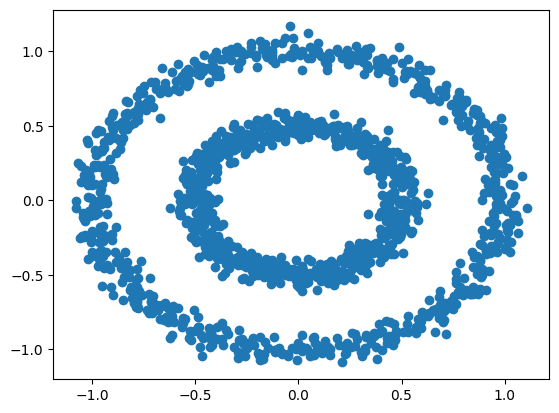

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DATA_SET/circle_data.csv")
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.show()

In [ ]:
data.drop('Unnamed: 2', axis=1, inplace=True)

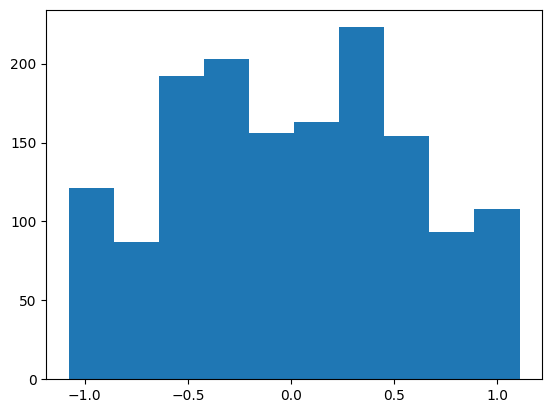

In [ ]:
plt.hist(data.iloc[:,0])
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
ideal_k = []
for i in range(1,21):
    est_kmeans = KMeans(n_clusters=i, random_state=0)
    est_kmeans.fit(data)

    ideal_k.append([i,est_kmeans.inertia_])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
ideal_k = np.array(ideal_k)

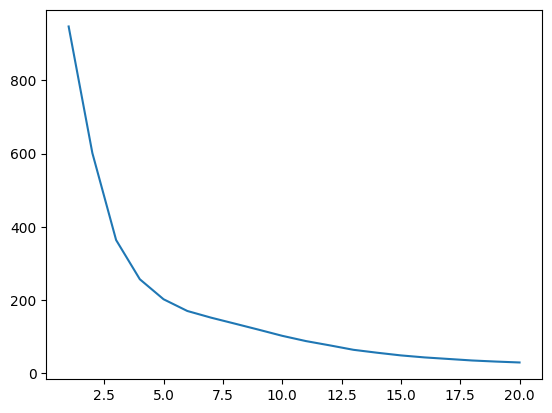

In [ ]:
plt.plot(ideal_k[:,0],ideal_k[:,1])
plt.show()

In [ ]:
est_kmeans = KMeans(n_clusters=5, random_state=0)
est_kmeans.fit(data)
pred_kmeans = est_kmeans.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


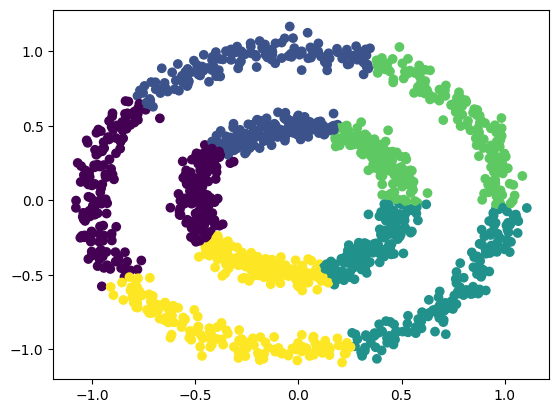

In [ ]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=pred_kmeans)
plt.show()

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
est_meanshift = MeanShift(bandwidth=0.5)
est_meanshift.fit(data)
pred_meanshift = est_meanshift.predict(data)

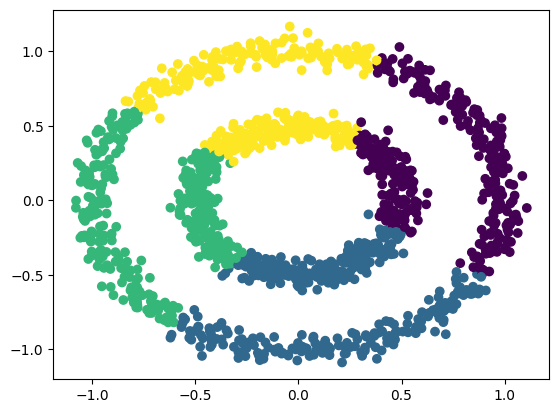

In [ ]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=pred_meanshift)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
est_dbscan = DBSCAN(eps=0.1)
pred_dbscan = est_dbscan.fit_predict(data)

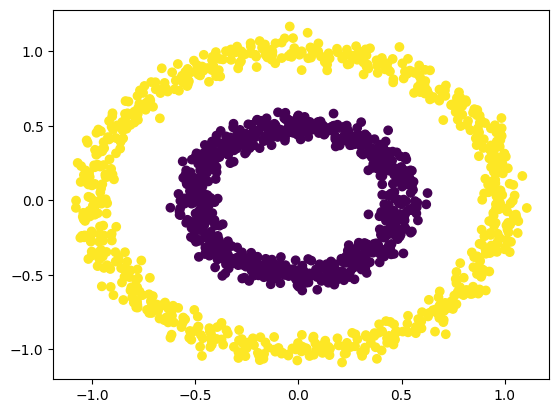

In [ ]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=pred_dbscan)
plt.show()

1. Import the Silhouette Coefficient score and the Calinski-Harabasz Index from the
scikit-learn library:

In [ ]:
from sklearn.metrics import silhouette_score

from sklearn.metrics import calinski_harabasz_score

2. Calculate the Silhouette Coefficient score for each of the algorithms we modeled
in all of the previous exercises. Use the Euclidean distance as the metric for
measuring the distance between points.

The input parameters of the **silhouette_score()** function are the data, the
predicted values of the model (the clusters assigned to each data point), and the
distance measure:

****
**Note:**

The code snippet shown here uses a backslash ( \ ) to split the logic
across multiple lines. When the code is executed, Python will ignore the
backslash, and treat the code on the next line as a direct continuation of the
current line.

****

In [ ]:
"""
metric-

['euclidean', 'l2', 'l1', 'manhattan', 'cityblock',
'braycurtis', 'canberra', 'chebyshev', 'correlation',
'cosine', 'dice', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis',
'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean',
'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski',
'nan_euclidean', 'haversine'

"""



kmeans_score = silhouette_score(data, pred_kmeans, \
                                metric='euclidean')

meanshift_score = silhouette_score(data, pred_meanshift,\
                                   metric='euclidean')

dbscan_score = silhouette_score(data, pred_dbscan,\
                                metric='euclidean')

print(kmeans_score, meanshift_score, dbscan_score)

0.359442401267602 0.37053513155051954 0.11394082711454383


The first three lines call the **silhouette_score()** function over each of the
models (the k-mean, the mean-shift, and the DBSCAN algorithms) by inputting
the data, the predictions, and the distance measure. The last line of code prints
out the score for each of the models.

The scores come to be around $0.359$, $0.3705$, and $0.1139$ for the k-means,
mean-shift, and DBSCAN algorithms, respectively.

You can observe that both k-means and mean-shift algorithms have similar
scores, while the DBSCAN score is closer to zero. This can indicate that the
performance of the first two algorithms is much better, and hence, the DBSCAN
algorithm should not be considered to solve the data problem.

Nevertheless, it is important to remember that this type of score does not
perform well when evaluating the DBSCAN algorithm. This is basically because
as one cluster is surrounding the other one, the score can interpret that as an
overlap when, in reality, the clusters are very well-defined, as is the case of the
current dataset.

3. Calculate the Calinski-Harabasz index for each of the algorithms we modeled in
the previous exercises in this chapter. The input parameters of the **calinski_
harabasz_score()** function are the data and the predicted values of the
model (the clusters assigned to each data point):

In [ ]:
kmeans_score = calinski_harabasz_score(data, pred_kmeans)

meanshift_score = calinski_harabasz_score(data, pred_meanshift)

dbscan_score = calinski_harabasz_score(data, pred_dbscan)

print(kmeans_score, meanshift_score, dbscan_score)

1379.6867334728695 1305.1425651803243 0.0017164733397059162


Again, the first three lines apply the **calinski_harabasz_score()** function
over the three models by passing the data and the prediction as inputs. The last
line prints out the results.

The values come to approximately $1379.7, 1305.14$, and $0.0017$ for the
k-means, mean-shift, and DBSCAN algorithms, respectively. Once again, the
results are similar to the ones we obtained using the Silhouette Coefficient score,
where both the k-means and mean-shift algorithms performed similarly well,
while the DBSCAN algorithm did not.

Moreover, it is worth mentioning that the scale of each method (the Silhouette
Coefficient score and the Calinski-Harabasz index) differs significantly, so they
are not easily comparable.

You have successfully measured the performance of three different
clustering algorithms.

In conclusion, the scores presented in this topic are a way of evaluating the
performance of clustering algorithms. However, it is important to consider that
the results from these scores are not definitive as their performance varies from
algorithm to algorithm.

#Activity 2.05: Measuring and Comparing the Performance of the Algorithms

You might find yourself in a situation in which you are not sure about the
performance of the algorithms as it cannot be evaluated graphically. Therefore, you
will have to measure the performance of the algorithms using numerical metrics
that can be used to make comparisons. For the previously trained models, calculate
the Silhouette Coefficient score and the Calinski-Harabasz index to measure the
performance of the algorithms. The following steps provide hints regarding how you
can do this:

In [ ]:
# Activity 2.01

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/DATA_SET/Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
data.shape

(440, 8)

In [ ]:
outliers = {}
for i in range(data.shape[1]):
  min_t = data[data.columns[i]].mean() - (3 * data[data.columns[i]].std())
  max_t = data[data.columns[i]].mean() + (3 * data[data.columns[i]].std())
  count = 0
  for j in data[data.columns[i]]:
    if j < min_t or j > max_t:
      count += 1
  outliers[data.columns[i]] = [count, data.shape[0] - count]
print(outliers)

{'Channel': [0, 440], 'Region': [0, 440], 'Fresh': [7, 433], 'Milk': [9, 431], 'Grocery': [7, 433], 'Frozen': [6, 434], 'Detergents_Paper': [10, 430], 'Delicassen': [4, 436]}


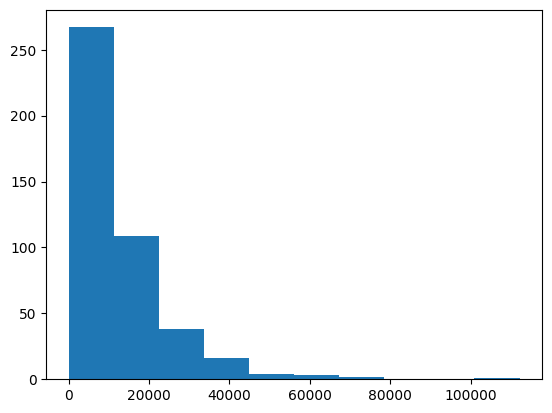

In [ ]:
plt.hist(data['Fresh'])
plt.show()

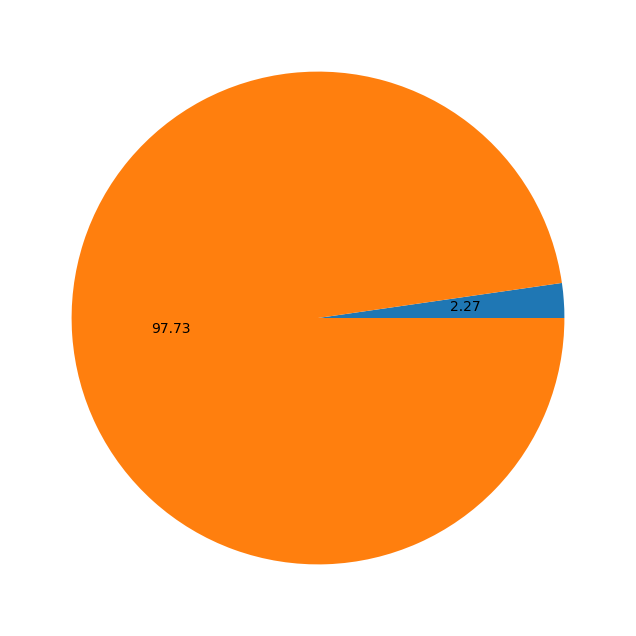

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(outliers['Detergents_Paper'], autopct="%.2f")
plt.show()

In [ ]:
data_standardized = (data - data.mean()) / data.std()
data_standardized.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.447005,0.589997,0.052873,0.522972,-0.041068,-0.588697,-0.043519,-0.066264
1,1.447005,0.589997,-0.390857,0.543839,0.170125,-0.269829,0.086309,0.089050
2,1.447005,0.589997,-0.446521,0.408073,-0.028125,-0.137379,0.133080,2.240742
3,-0.689512,0.589997,0.099998,-0.623310,-0.392530,0.686363,-0.498021,0.093305
4,1.447005,0.589997,0.839284,-0.052337,-0.079266,0.173661,-0.231654,1.297870


<Center>Figure 2.16: Rescaled data

In [ ]:
# Activity 2.02

from sklearn.cluster import KMeans

In [ ]:
ideal_k = []
for i in range(1,21):
  est_kmeans = KMeans(n_clusters=i, random_state=0)
  est_kmeans.fit(data_standardized)

  ideal_k.append([i, est_kmeans.inertia_])

ideal_k = np.array(ideal_k)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

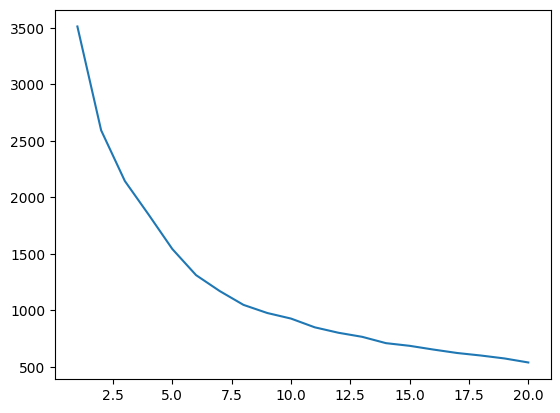

In [ ]:
plt.plot(ideal_k[:,0], ideal_k[:,1])
plt.show()

In [ ]:
# A number of 6 cluster was selected

est_kmeans = KMeans(n_clusters=6, random_state=0)
est_kmeans.fit(data_standardized)
pred_kmeans = est_kmeans.predict(data_standardized)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


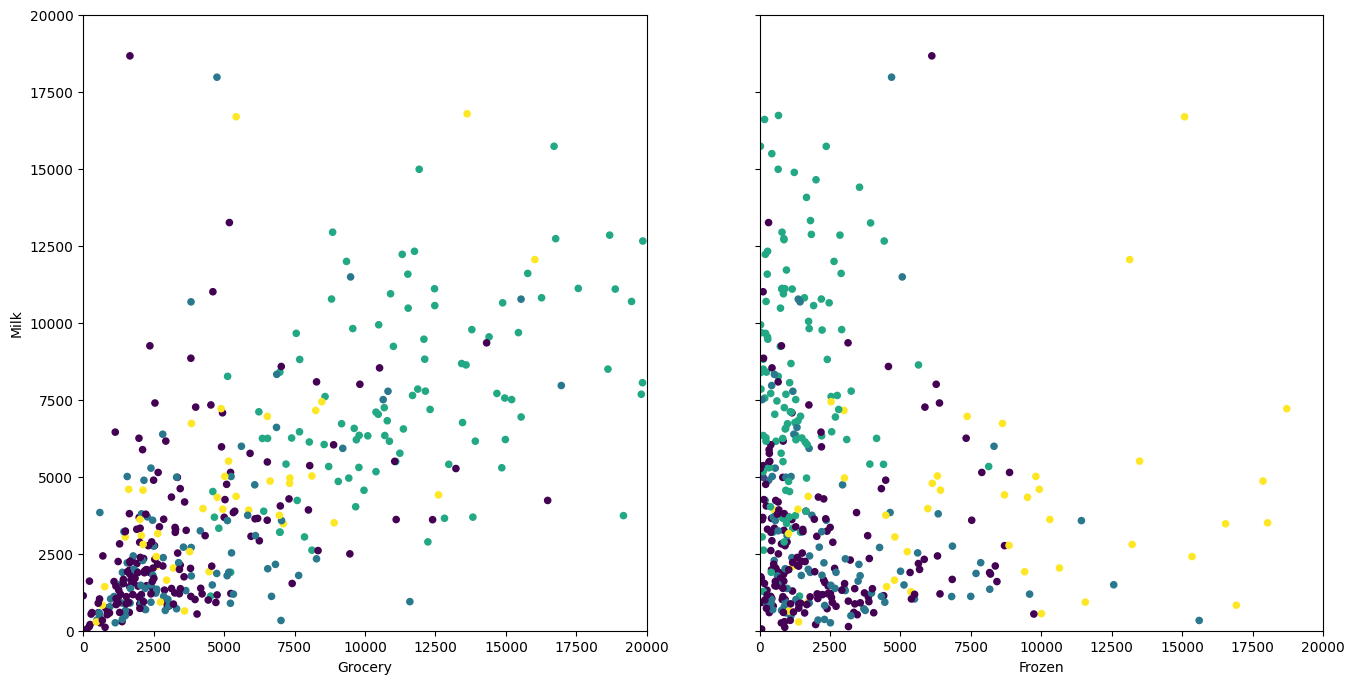

In [ ]:
plt.subplots(1,2, sharex='col', sharey='row', figsize=(16,8))
plt.scatter(data.iloc[:,5], data.iloc[:,3], c=pred_kmeans, s=20)
plt.xlim([0,20000])
plt.ylim([0,20000])
plt.xlabel('Frozen')
plt.subplot(1,2,1)
plt.scatter(data.iloc[:,4], data.iloc[:,3], c=pred_kmeans, s=20)
plt.xlim([0,20000])
plt.ylim([0,20000])
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()

In [ ]:
# Activity 2.03

from sklearn.cluster import MeanShift

In [ ]:
est_meanshift = MeanShift(bandwidth=0.4)
est_meanshift.fit(data_standardized)
pred_meanshift = est_meanshift.predict(data_standardized)

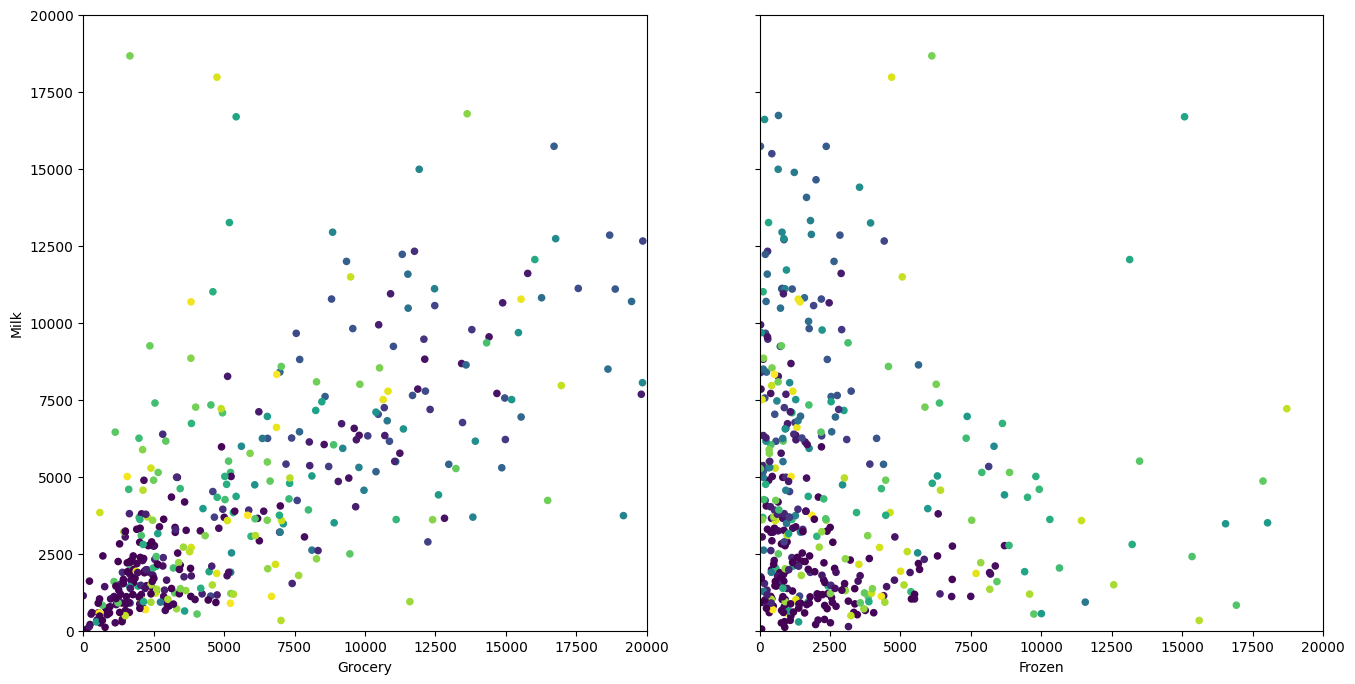

In [ ]:
plt.subplots(1,2, sharex='col', sharey='row', figsize=(16,8))
plt.scatter(data.iloc[:,5], data.iloc[:,3], c=pred_meanshift, s=20)
plt.xlim([0,20000])
plt.ylim([0,20000])
plt.xlabel('Frozen')
plt.subplot(1,2,1)
plt.scatter(data.iloc[:,4], data.iloc[:,3], c=pred_meanshift, s=20)
plt.xlim([0,20000])
plt.ylim([0,20000])
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()

In [ ]:
# Activity 2.04

from sklearn.cluster import DBSCAN

In [ ]:
est_dbscan = DBSCAN(eps=0.8)
pred_dbscan = est_dbscan.fit_predict(data_standardized)

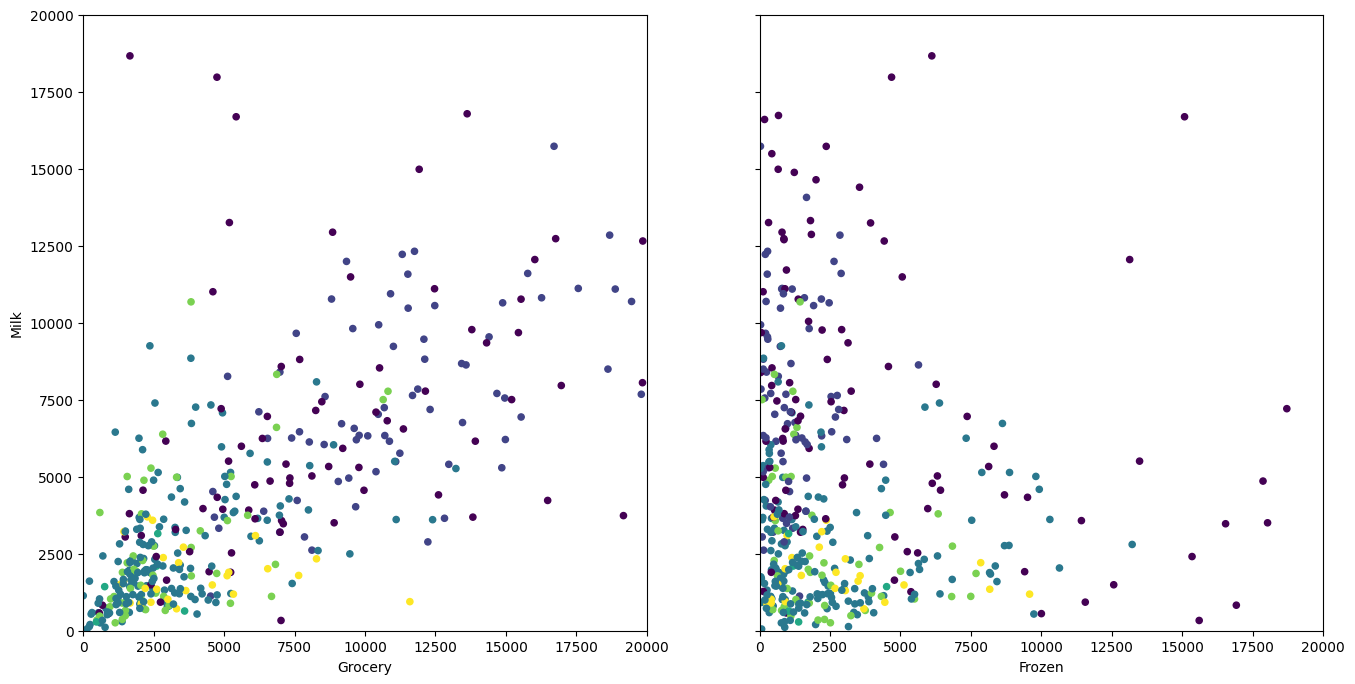

In [ ]:
plt.subplots(1,2, sharex='col', sharey='row', figsize=(16,8))
plt.scatter(data.iloc[:,5], data.iloc[:,3], c=pred_dbscan, s=20)
plt.xlim([0,20000])
plt.ylim([0,20000])
plt.xlabel('Frozen')
plt.subplot(1,2,1)
plt.scatter(data.iloc[:,4], data.iloc[:,3], c=pred_dbscan, s=20)
plt.xlim([0,20000])
plt.ylim([0,20000])
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.show()

1. Calculate both the Silhouette Coefficient score and the Calinski–Harabasz index
for all the models that you trained previously.

First, import the metrics:

In [ ]:
from sklearn.metrics import silhouette_score

from sklearn.metrics import calinski_harabasz_score

Calculate the Silhouette Coefficient score for all the algorithms, as shown in the
following code:

In [ ]:
kmeans_score = silhouette_score(data_standardized,\
                                pred_kmeans, \
                                metric='euclidean')

meanshift_score = silhouette_score(data_standardized,\
                                   pred_meanshift, \
                                   metric='euclidean')

dbscan_score = silhouette_score(data_standardized,\
                                pred_dbscan,\
                                metric='euclidean')

print(kmeans_score, meanshift_score, dbscan_score)

0.35372758942528437 0.09334580346864553 0.16856375605964766


The scores come to be around $0.3515$, $0.0933$, and $0.1685$ for the k-means,
mean-shift, and DBSCAN algorithms, respectively.

Finally, calculate the Calinski–Harabasz index for all the algorithms. The following
is a snippet of the code for this:

In [ ]:
kmeans_score = calinski_harabasz_score(data_standardized,\
                                pred_kmeans)

meanshift_score = calinski_harabasz_score(data_standardized,\
                                   pred_meanshift)

dbscan_score = calinski_harabasz_score(data_standardized,\
                                pred_dbscan)

print(kmeans_score, meanshift_score, dbscan_score)

145.60331751743607 112.90534400805596 42.45114955569689


The scores come to be approximately $145.60$, $112.90$, and $42.45$ for the
three algorithms in the order given in the preceding code snippet.

****
By quickly looking at the results we obtained for both metrics, it is possible to
conclude that the k-means algorithm outperforms the other models, and hence
should be the one that's selected to solve the data problem.
****

#Summary

Data problems where the input data is unrelated to the labeled output are handled
using unsupervised learning models. The main objective of such data problems is to
understand the data by finding patterns that, in some cases, can be generalized to
new instances.

In this context, this sheet covered clustering algorithms, which work by aggregating
similar data points into clusters, while separating data points that differ significantly.

Three different clustering algorithms were applied to the dataset and their
performance was compared so that we can choose the one that best fits the data.
Two different metrics for performance evaluation, the Silhouette Coefficient metric
and the Calinski-Harabasz index, were also discussed in light of the inability to
represent all of the features in a plot, and thereby graphically evaluate performance
of the algorithms. However, it is important to understand that the result from the
metric's evaluation is not absolute as some metrics perform better (by default) for
some algorithms than for others.

In the next sheet, we will understand the steps involved in solving a data
problem using supervised machine learning algorithms and learn how to perform
error analysis.

****
<Center>END OF SCRIPT

****